<a href="https://colab.research.google.com/github/Alvaro217-h/challege1_alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
lista_tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["tienda", "tienda2", "tienda3", "tienda4"]

    Tienda        Precio
0   tienda  1.150880e+09
1  tienda2  1.116344e+09
2  tienda3  1.098020e+09
3  tienda4  1.038376e+09




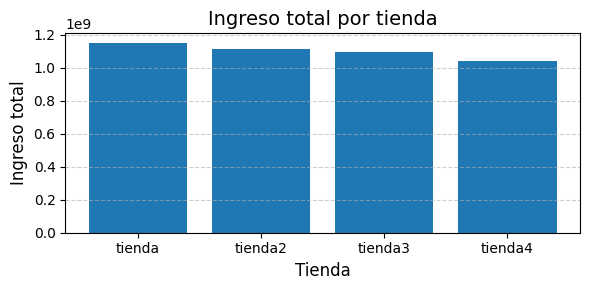

In [ ]:
#calcular el ingreso total de cada tienda
ingreso_total = pd.DataFrame({
    'Tienda': nombres,
    'Precio': [df['Precio'].sum() for df in lista_tiendas]
})

print(ingreso_total)
print("\n")

# --- Crear el gráfico de barras ---
ingreso_total = ingreso_total.sort_values(by='Precio', ascending=False)
plt.figure(figsize=(6, 3))  # tamaño del gráfico
plt.bar(ingreso_total['Tienda'], ingreso_total['Precio'])  # eje x = Tienda, eje y = Precio

# --- Personalizar el gráfico ---
plt.title('Ingreso total por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso total', fontsize=12)
plt.xticks(rotation=0)  # rotar etiquetas para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.6)  # líneas de guía horizontales

# --- Mostrar el gráfico ---
plt.tight_layout()
plt.show()




# 2. Ventas por categoría

In [ ]:
ventas_por_categoria = {}

for nombre, df in zip(nombres, lista_tiendas):
    df_resumen = (
        df.groupby('Categoría del Producto')['Producto']
          .count()
          .reset_index(name='Cantidad de productos vendidos')
          .sort_values(by='Cantidad de productos vendidos', ascending=False)
          .reset_index(drop=True)
    )
    #crear columna tiendas con los nombres asociados
    df_resumen['Tienda'] = nombre
    #guardar el data frame generado para cada tienda
    ventas_por_categoria[nombre] = df_resumen

for nombre in nombres:
    print("="*60)
    print(f"Tienda: {nombre}")
    print("="*60)
    print(ventas_por_categoria[nombre].to_string(index=False))
    print("\n")

Tienda: tienda
 Categoría del Producto  Cantidad de productos vendidos Tienda
                Muebles                             465 tienda
           Electrónicos                             448 tienda
               Juguetes                             324 tienda
      Electrodomésticos                             312 tienda
   Deportes y diversión                             284 tienda
 Instrumentos musicales                             182 tienda
                 Libros                             173 tienda
Artículos para el hogar                             171 tienda


Tienda: tienda2
 Categoría del Producto  Cantidad de productos vendidos  Tienda
                Muebles                             442 tienda2
           Electrónicos                             422 tienda2
               Juguetes                             313 tienda2
      Electrodomésticos                             305 tienda2
   Deportes y diversión                             275 tienda2
 Instrumentos mu

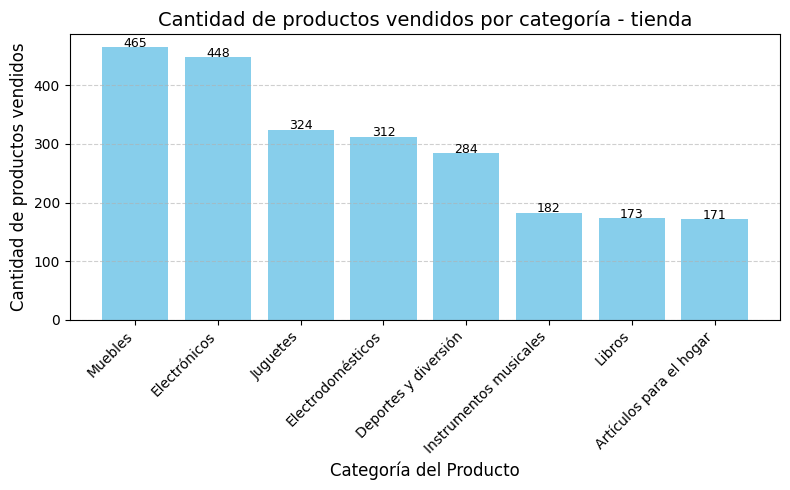

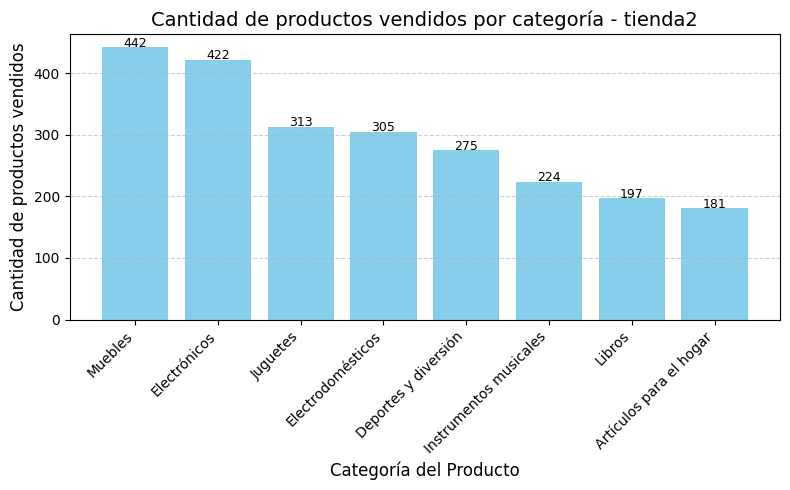

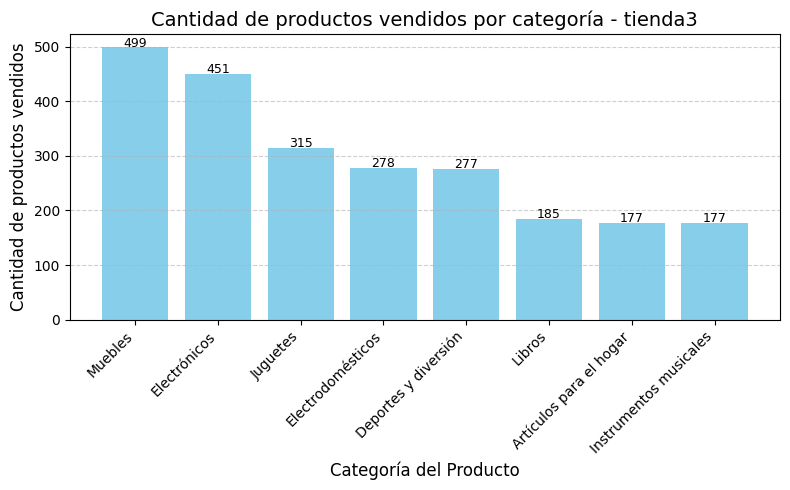

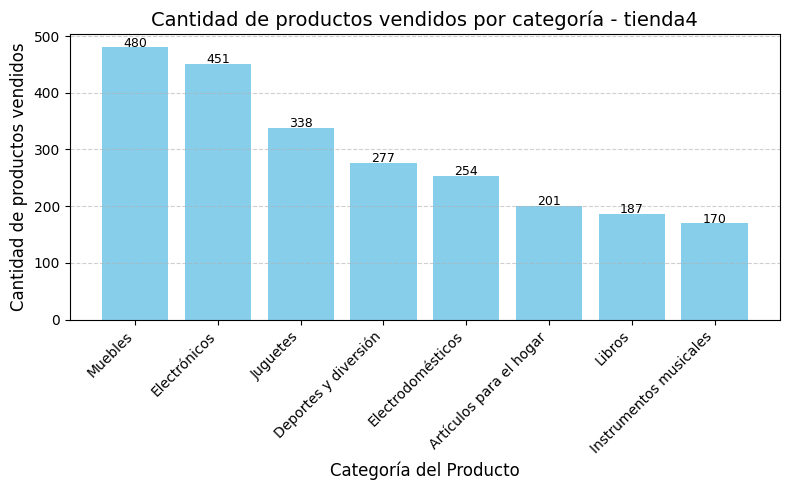

In [ ]:
# Recorremos cada tienda
for nombre in nombres:
    df = ventas_por_categoria[nombre]

    plt.figure(figsize=(8, 5))
    plt.bar(df['Categoría del Producto'], df['Cantidad de productos vendidos'], color='skyblue')

    plt.title(f'Cantidad de productos vendidos por categoría - {nombre}', fontsize=14)
    plt.xlabel('Categoría del Producto', fontsize=12)
    plt.ylabel('Cantidad de productos vendidos', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Mostrar etiquetas con los valores encima de cada barra
    for i, valor in enumerate(df['Cantidad de productos vendidos']):
        plt.text(i, valor + 1, str(valor), ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


    Tienda  Calificación media
0   tienda            3.976685
1  tienda2            4.037304
2  tienda3            4.048326
3  tienda4            3.995759




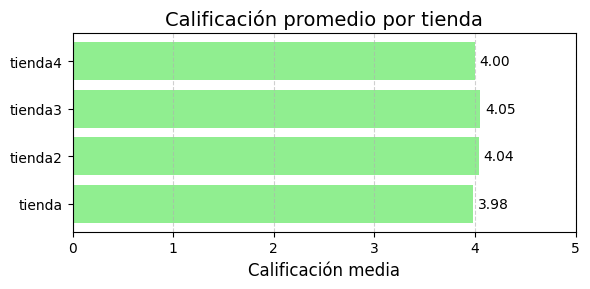

In [ ]:
#calcular las calificaciones promedio de los clientes para cada tienda.
valoracion_media = pd.DataFrame({
    'Tienda': nombres,
    'Calificación media': [df['Calificación'].mean() for df in lista_tiendas]
})

print(valoracion_media)
print("\n")


plt.figure(figsize=(6, 3))
plt.barh(valoracion_media['Tienda'], valoracion_media['Calificación media'], color='lightgreen')

plt.title('Calificación promedio por tienda', fontsize=14)
plt.xlabel('Calificación media', fontsize=12)
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar los valores al final de cada barra
for i, valor in enumerate(valoracion_media['Calificación media']):
    plt.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

In [ ]:
# calcular los productos mas vendidos pora cada tienda
mas_vendidos_por_tienda = pd.DataFrame({
    'Tienda': nombres,
    'Productos mas vendidos': [df['Producto'].value_counts().head(5).index.to_list() for df in lista_tiendas]
})

print(mas_vendidos_por_tienda)

    Tienda                             Productos mas vendidos
0   tienda  [Microondas, TV LED UHD 4K, Armario, Secadora ...
1  tienda2  [Iniciando en programación, Microondas, Baterí...
2  tienda3  [Kit de bancas, Mesa de comedor, Cama king, Se...
3  tienda4  [Cama box, Cubertería, Dashboards con Power BI...


In [ ]:
# calcular los productos menos vendidos pora cada tienda
menos_vendidos_por_tienda = pd.DataFrame({
    'Tienda': nombres,
    'Productos menos vendidos': [df['Producto'].value_counts().tail(5).index.to_list() for df in lista_tiendas]
})

print(menos_vendidos_por_tienda)

    Tienda                           Productos menos vendidos
0   tienda  [Ciencia de datos con Python, Pandereta, Olla ...
1  tienda2  [Auriculares, Sillón, Mesa de comedor, Impreso...
2  tienda3  [Guitarra eléctrica, Set de vasos, Mochila, Mi...
3  tienda4  [Refrigerador, Ciencia de datos con Python, Gu...


# 5. Envío promedio por tienda

In [ ]:
#calcular el costo de envío promedio para cada tienda
costo_envio_promedio = pd.DataFrame({
    'Tienda': nombres,
    'Costo de envío promedio': [df['Costo de envío'].mean() for df in lista_tiendas]
})

print(costo_envio_promedio)

    Tienda  Costo de envío promedio
0   tienda             26018.609580
1  tienda2             25216.235693
2  tienda3             24805.680373
3  tienda4             23459.457167


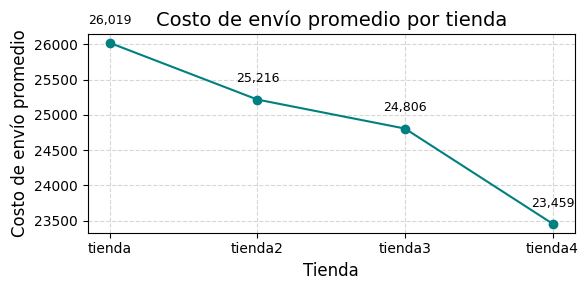

In [ ]:
# --- Crear gráfico de líneas ---
plt.figure(figsize=(6, 3))

plt.plot(
    costo_envio_promedio['Tienda'],
    costo_envio_promedio['Costo de envío promedio'],
    marker='o',        # puntos en cada tienda
    linestyle='-',      # línea continua
    color='teal'        # color de la línea
)

# --- Personalización ---
plt.title('Costo de envío promedio por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de envío promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar los valores en cada punto
for i, valor in enumerate(costo_envio_promedio['Costo de envío promedio']):
    plt.text(i, valor + (valor * 0.01), f'{valor:,.0f}', ha='center', fontsize=9)

# Mostrar gráfico
plt.show()

#Informe final

##introduccion

El presente análisis compara el desempeño de cuatro tiendas considerando tres indicadores clave: ingreso total, calificación promedio y costo de envío. A partir de estos datos, se busca identificar cuál tienda presenta el mejor equilibrio entre rentabilidad, satisfacción del cliente y eficiencia logística. Este estudio permite determinar fortalezas y debilidades de cada tienda para orientar decisiones estratégicas de venta.

## Analisis

* La tienda 4 presenta el desempeño más bajo entre todas las evaluadas. Su ingreso total (1.038 × 10⁹) es el menor, lo que refleja un volumen de ventas significativamente inferior en comparación con las demás tiendas.

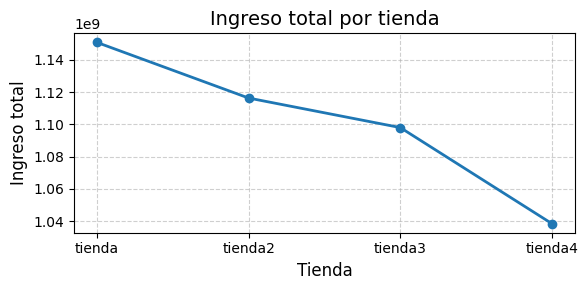

In [ ]:
# Crear el gráfico de líneas
plt.figure(figsize=(6, 3))
plt.plot(ingreso_total['Tienda'], ingreso_total['Precio'], marker='o', linestyle='-', linewidth=2)

# Personalizar el gráfico
plt.title('Ingreso total por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso total', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

*  Aunque la calificación promedio de la tienda 4 (3.99) no es mala, está por debajo de tiendas con mejor reputación, como la tienda 3 (4.05)

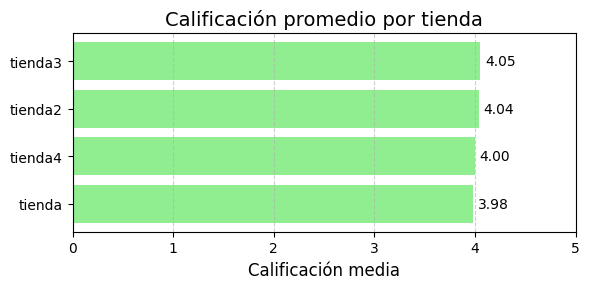

In [ ]:
# Ordenar de forma descendente
valoracion_media = valoracion_media.sort_values(by='Calificación media', ascending=True).reset_index(drop=True)

plt.figure(figsize=(6, 3))
plt.barh(valoracion_media['Tienda'], valoracion_media['Calificación media'], color='lightgreen')

plt.title('Calificación promedio por tienda', fontsize=14)
plt.xlabel('Calificación media', fontsize=12)
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar los valores al final de cada barra
for i, valor in enumerate(valoracion_media['Calificación media']):
    plt.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

*  la tienda 4 presenta el costo de envío más bajo, este ahorro no compensa la baja rentabilidad ni mejora significativamente la percepción del cliente

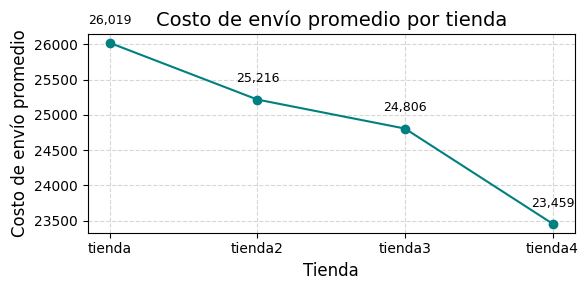

In [ ]:
# --- Crear gráfico de líneas ---
plt.figure(figsize=(6, 3))

plt.plot(
    costo_envio_promedio['Tienda'],
    costo_envio_promedio['Costo de envío promedio'],
    marker='o',        # puntos en cada tienda
    linestyle='-',      # línea continua
    color='teal'        # color de la línea
)

# --- Personalización ---
plt.title('Costo de envío promedio por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de envío promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar los valores en cada punto
for i, valor in enumerate(costo_envio_promedio['Costo de envío promedio']):
    plt.text(i, valor + (valor * 0.01), f'{valor:,.0f}', ha='center', fontsize=9)

# Mostrar gráfico
plt.show()

## Conlusion
La tienda con peor desempeño en general es **tienda4**.

Razones:

*  Presenta el menor ingreso total, lo que refleja un bajo nivel de ventas.

*  Su calificación promedio es aceptable, pero no sobresaliente frente a las demás.

*  Aunque tiene el costo de envío más bajo, este factor no compensa su baja rentabilidad ni mejora su posición competitiva.

**tienda4** presenta el rendimiento más bajo en todos los indicadores analizados, lo que la convierte en la candidata ideal para ser seleccionada para la venta.

#README

In [ ]:
%%writefile README.md
# 🛍️ Análisis de Desempeño de Tiendas con Python y Pandas

Este proyecto realiza un análisis comparativo del rendimiento de cuatro tiendas utilizando **Python**, **pandas** y **matplotlib**.
El objetivo es identificar la tienda con mejor desempeño general considerando métricas de **ingresos totales**, **Ventas por categoría**, **Productos más y menos vendidos**,
**calificación promedio** y **costo de envío promedio**.

---

## 📊 Objetivos del análisis
- Calcular el **ingreso total** de cada tienda.
- Determinar la **cantidad de productos vendidos** por categoría.
- Identificar los **productos más y menos vendidos** por tienda.
- Obtener la **calificación promedio** por tienda.
- Determinar el **costo de envío promedio**.
- Representar los resultados mediante **gráficos de líneas y barras**.
- Identificar la tienda con **peor desempeño global** para considerar su venta.

---

## 🧮 Herramientas utilizadas
- **Python 3**
- **pandas** para el procesamiento y análisis de datos.
- **matplotlib** para la visualización de resultados.
- **Google Colab** como entorno de desarrollo.

---

## 📈 Resultados destacados
- **Tienda 4** presenta el menor ingreso total, una calificación promedio solo aceptable y aunque tiene el costo de envío más bajo, no compensa su bajo rendimiento.
  Por ello, se considera **la candidata más adecuada para vender**.

---

## 🚀 Cómo ejecutar el análisis
1. Clona el repositorio:
   ```bash
   git clone https://github.com/Alvaro217-h/challege1_alura.git


Writing README.md


In [ ]:
!cat README.md


# 🛍️ Análisis de Desempeño de Tiendas con Python y Pandas

Este proyecto realiza un análisis comparativo del rendimiento de cuatro tiendas utilizando **Python**, **pandas** y **matplotlib**.
El objetivo es identificar la tienda con mejor desempeño general considerando métricas de **ingresos totales**, **Ventas por categoría**, **Productos más y menos vendidos**,
**calificación promedio** y **costo de envío promedio**.

---

## 📊 Objetivos del análisis
- Calcular el **ingreso total** de cada tienda.
- Determinar la **cantidad de productos vendidos** por categoría.
- Identificar los **productos más y menos vendidos** por tienda.
- Obtener la **calificación promedio** por tienda.
- Determinar el **costo de envío promedio**.
- Representar los resultados mediante **gráficos de líneas y barras**.
- Identificar la tienda con **peor desempeño global** para considerar su venta.

---

## 🧮 Herramientas utilizadas
- **Python 3**
- **pandas** para el procesamiento y análisis de datos.
- **matplotl